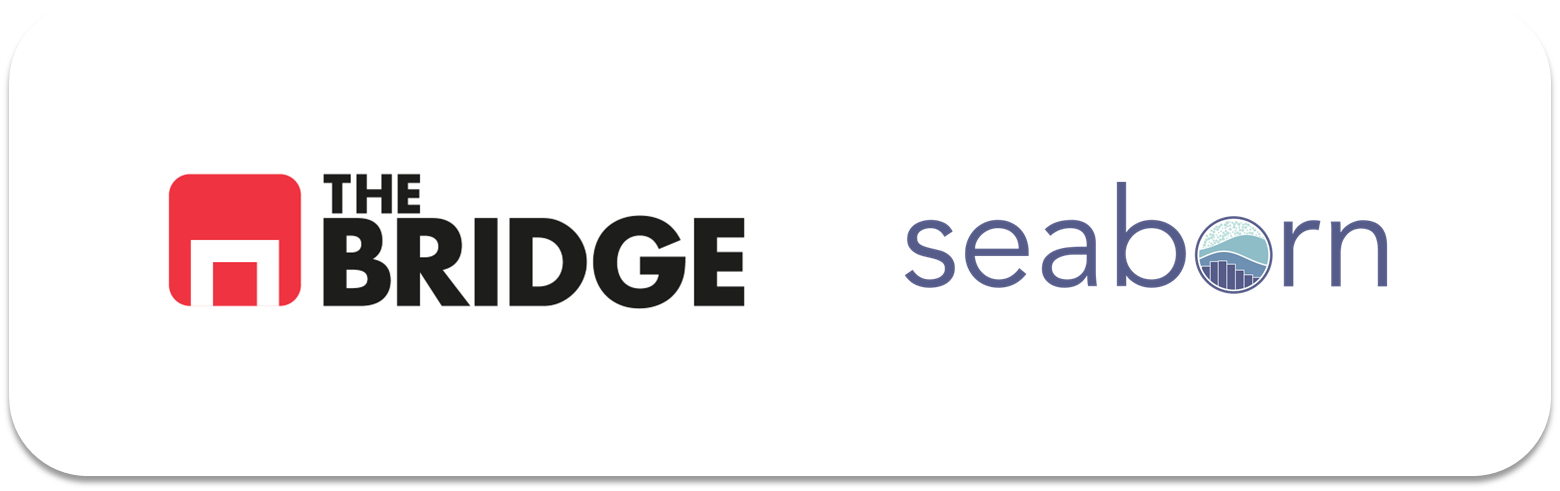

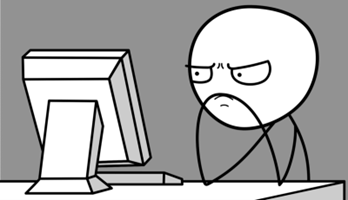

Para ejercitarte y afianzar lo aprendido sobre visualización de datos de variables columnas a la vez, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Ejercicio 1

Carga los siguientes datasets que necesitarás para poder hacer el resto de ejercicios:
1. Titanic, "./data/titanic.csv"
2. Viajes, "./data/dataset_viajes_jun23"

In [3]:
df_titanic = pd.read_csv("/Users/alvarosanchez/ONLINE_DS_THEBRIDGE_ALVAROSMMS-1/ONLINE_DS_THEBRIDGE_ALVAROSMMS/Sprint_8/Unidad_2/Workout/data/titanic.csv")
df_viajes = pd.read_csv("/Users/alvarosanchez/ONLINE_DS_THEBRIDGE_ALVAROSMMS-1/ONLINE_DS_THEBRIDGE_ALVAROSMMS/Sprint_8/Unidad_2/Workout/data/dataset_viajes_jun23.csv")

### Ejercicio 2

Crea una función que tenga como argumentos un dataframe, el nombre de una columa categórica, el nombre de otra columna categórica y que haga lo siguiente:
1. Dibuje una combinación de gráficas con las frecuencias absolutas de cada columna categórica y una figura con el catplot de las dos columnas usando la segunda como valor para el argumento col. Utiliza countplot para las frecuencias y un subplots de 1 fila y dos columnas, añade una figura con catplot para la comparación. 
2. Devuelva la tabla de contigencia de las dos columnas.


In [7]:
def analizar_columnas_categoricas(df, col1, col2):

    # Crear figura con dos subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Graficar frecuencias absolutas para col1
    sns.countplot(data=df, x=col1, ax=axes[0])
    axes[0].set_title(f'Frecuencias de {col1}')
    axes[0].set_xlabel(col1)
    axes[0].set_ylabel('Frecuencia')

    # Graficar frecuencias absolutas para col2
    sns.countplot(data=df, x=col2, ax=axes[1])
    axes[1].set_title(f'Frecuencias de {col2}')
    axes[1].set_xlabel(col2)
    axes[1].set_ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()

    # Graficar catplot comparativo
    sns.catplot(data=df, x=col1, col=col2, kind="count", height=5, aspect=1.2)
    plt.show()

    # Crear tabla de contingencia
    tabla_contingencia = pd.crosstab(df[col1], df[col2])

    return tabla_contingencia


### Ejercicio 3

Aplicalo para comparar por un lado "alive" y "who" y "alive" y "class" del dataset del titanic.

#### Alive y who

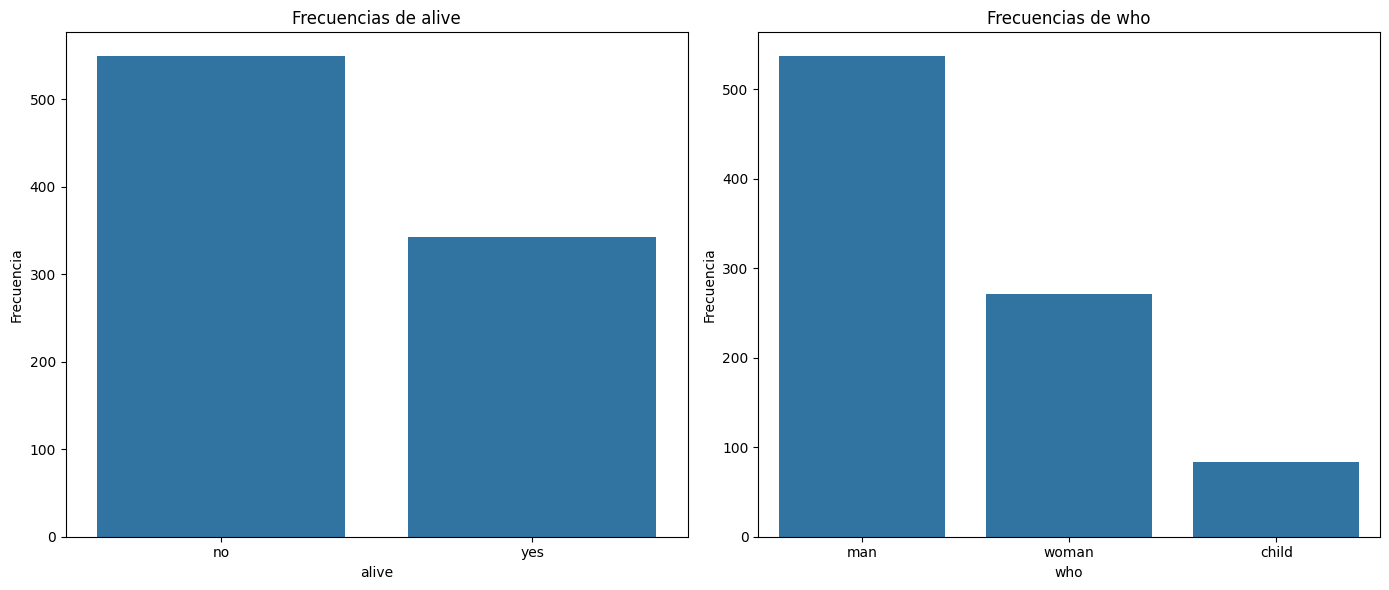

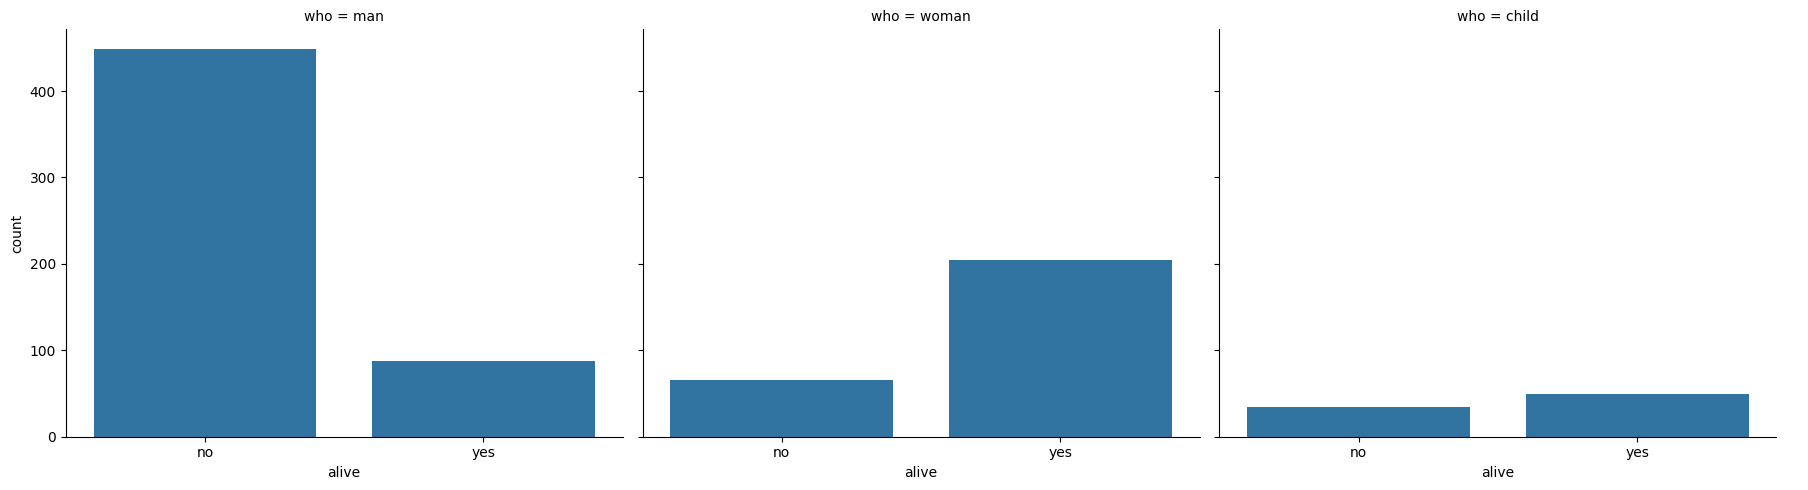

who,child,man,woman
alive,,,
no,34,449,66
yes,49,88,205


In [5]:
analizar_columnas_categoricas(df_titanic,"alive","who")

#### Alive y Class

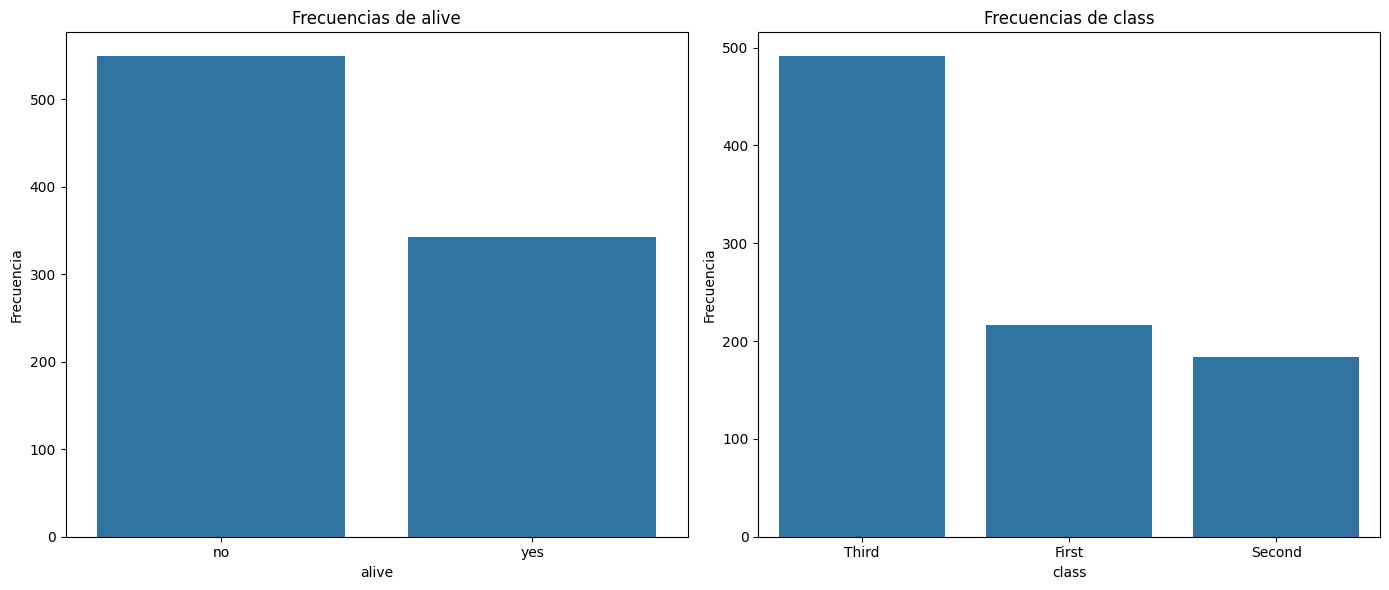

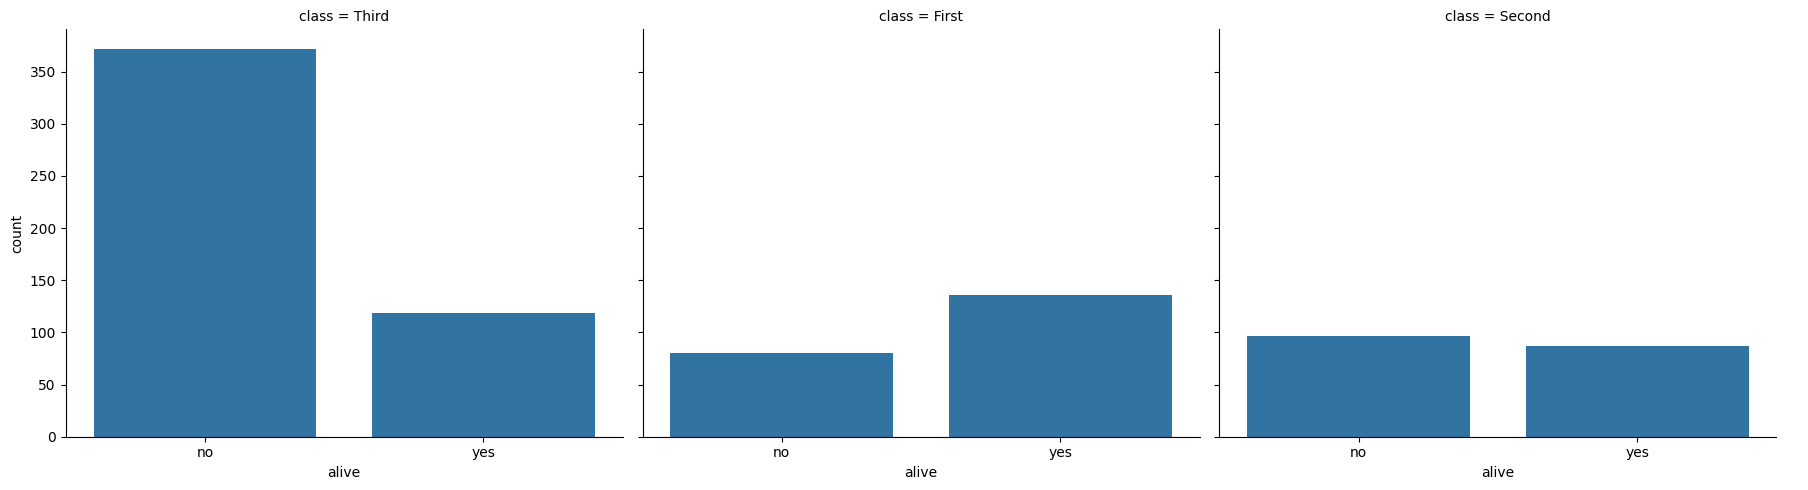

class,First,Second,Third
alive,,,
no,80,97,372
yes,136,87,119


In [6]:
analizar_columnas_categoricas(df_titanic,"alive","class")

### Ejercicio 4

Crea una función que compare ahora una variable categórica y otra numérica. Para ello, se aconseja reutilizar código de las funciones que viste en el grupo anterior de ejercicios para pintar histogramas, crea una función que haga lo siguiente:
1. Admita tres parámetros o argumentos: Un dataframe, el nombre de una columna categórica del mismo, el nombre de una columna numérica del mismo.
2. Cree una matriz de gráficos, tantas como valores de la variable categórica, con un máximo de tres columnas por fila y todas las filas que necesite.
3. Asigne a cada gráfica el histograma de la variable numérica pero sólo para las filas que tengan el valor que corresponda de la variable categórica (así si el primer valor de la categórica es Val1 y la variable numérica se llama Num1, en la primera gráfica estará el histograma de Num1 sólo para las filas que tengan Val1)
4. Añada el título "Histograma de {variable numerica} para el valor {valor correspondiente de la categórica} a cada gráfica.

In [11]:
def comparar_categorica_numerica(df, col_cat, col_num):
 
    # Obtener los valores únicos de la columna categórica
    categorias = df[col_cat].unique()
    num_categorias = len(categorias)

    # Determinar el número de filas y columnas necesarias
    cols = 3
    rows = (num_categorias + cols - 1) // cols

    # Crear la figura y los ejes
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    axes = axes.flatten()  # Aplanar los ejes para iterar fácilmente

    # Iterar sobre las categorías y generar histogramas
    for i, categoria in enumerate(categorias):
        # Filtrar los datos para la categoría actual
        datos_filtrados = df[df[col_cat] == categoria][col_num]

        # Graficar el histograma
        axes[i].hist(datos_filtrados, bins=10, edgecolor='black')
        axes[i].set_title(f'Histograma de {col_num}\npara {col_cat} = {categoria}')
        axes[i].set_xlabel(col_num)
        axes[i].set_ylabel('Frecuencia')

plt.tight_layout()




<Figure size 640x480 with 0 Axes>

### Ejercicio 5

Aplica la función anterior para ver los histogramas de "ingresos" y "consumo_kg" por compañía aérea del dataset de viajes. ¿Qué argumentos añadirías a la función para poder generar mejores visualizaciones?

#### Aircompany e Ingresos

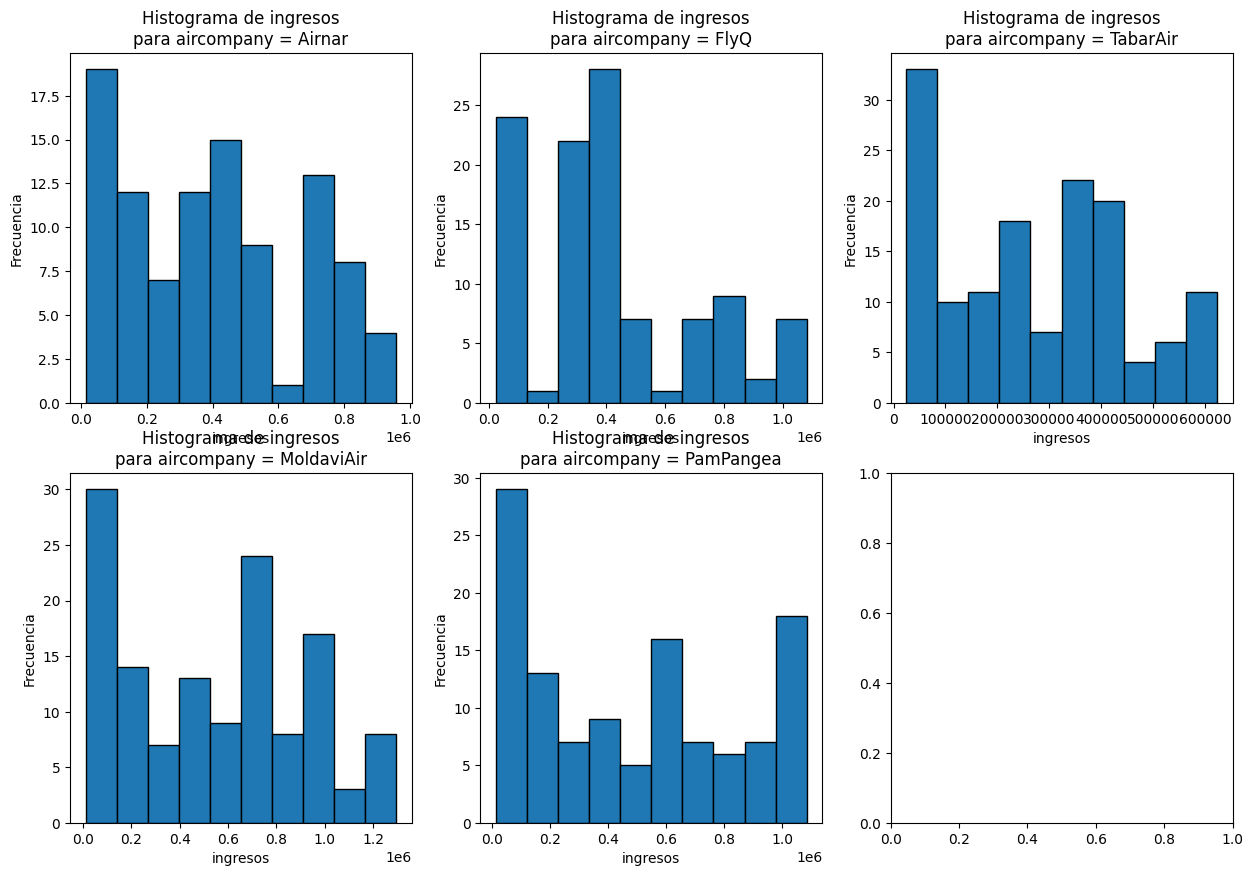

In [12]:
comparar_categorica_numerica(df_viajes,"aircompany","ingresos")

#### Aircompany y Consumo_kg

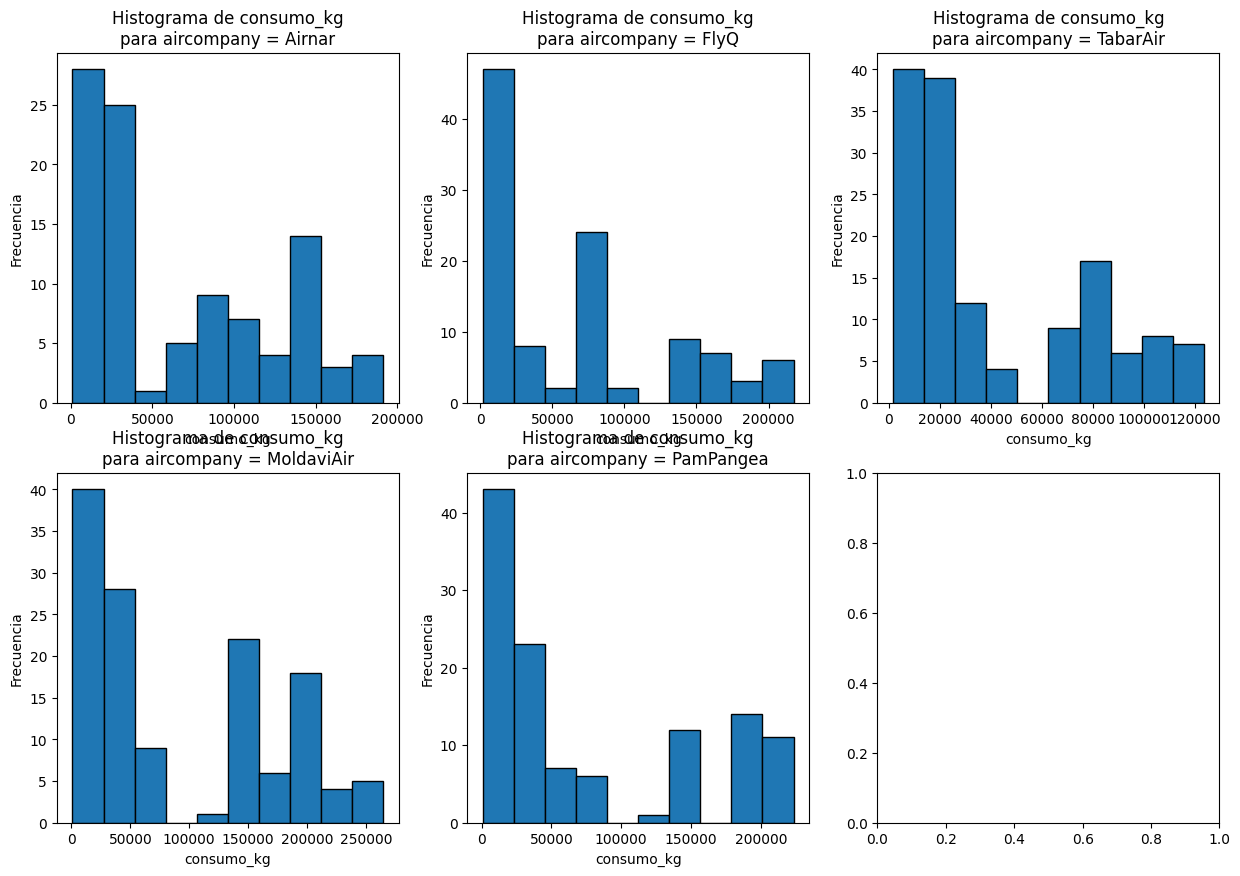

In [13]:
comparar_categorica_numerica(df_viajes,"aircompany","consumo_kg")

### Ejercicio 6

Crea una función para pintar diagramas de dispersion que tenga cinco argumentos:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos.

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn que uses. [Nota: como en todos los ejercicios anteriores, debes usar Seaborn para pintar]

In [14]:
def pintar_dispersión(df, col_x, col_y, col_cat=None, punto_tam=50):
    
    plt.figure(figsize=(10, 6))

    if col_cat:  # Si se proporciona una columna categórica
        scatter = sns.scatterplot(
            data=df,
            x=col_x,
            y=col_y,
            hue=col_cat,
            s=punto_tam,
            palette="viridis"
        )
        scatter.legend(title=col_cat)
    else:  # Si no se proporciona una columna categórica
        sns.scatterplot(
            data=df,
            x=col_x,
            y=col_y,
            s=punto_tam,
            color='blue'
        )

    plt.title(f'Diagrama de dispersión: {col_x} vs {col_y}')
    plt.xlabel(col_x)
    plt.ylabel(col_y)
    plt.grid(True)
    plt.show()


### Ejercicio 7

Usa la función del ejercicio anterior para pintar la comparativa entre ingresos, consumo_kg y compañía aérea. ¿Si quisieras usarla como visualización que quitarías, añadirías o remarcarías?

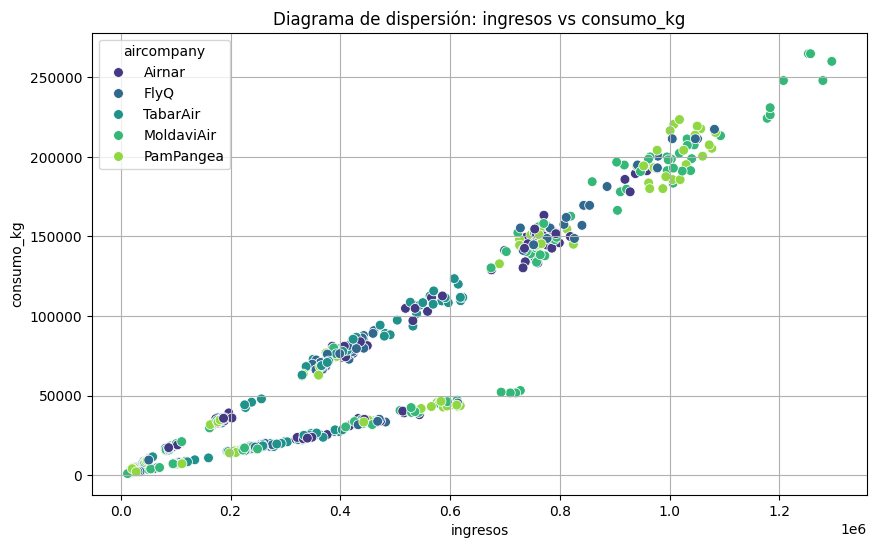

In [15]:
pintar_dispersión(df_viajes,"ingresos","consumo_kg",col_cat="aircompany", punto_tam=50)

### Ejercicio 8

Usa la función del ejercicio 6 para pintar la comparativa entre distancia, duración e ingresos. ¿Si quisieras usarla como visualización que quitarías, añadírías o remarcarías?

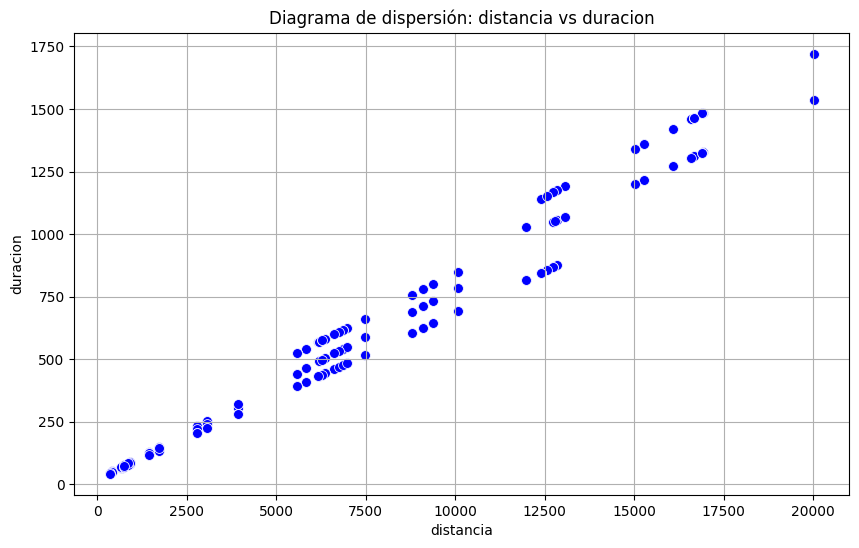

In [17]:
pintar_dispersión(df_viajes,"distancia","duracion",col_cat=None, punto_tam=50)